   
   # Predicting Solar Energy Potential with Machine Learning

>## Contents ##
>###### 1. Imports  
>###### 2. Pre-Processing  
>###### 3. Data Split
>###### 4. Exploratory Analysis 
>###### 5. Feature Selection 
        - Recursive Feature Elimination   
>###### 6. Models / / RandomCV / / Testing 
       - DummyRegressor  
       - RandromForestRegressor  
       - SGDRegressor  
       - MLPRegressor  
>###### 7. Summary of Scores 

>>## Imports ##

In [5]:
                                                                          # STANDARDS
import numpy as np 
import pandas as pd 
import pprint
                                                                          # PRE-PROCESSING
from sklearn.preprocessing import StandardScaler
                                                                          # FEATURE SELECTION
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel, mutual_info_regression, RFE, RFECV

                                                                          # PIPELINE
from sklearn.pipeline import Pipeline
                                                                          # REGRESSORS       
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
                                          
                                                                          # NEURAL NETWORK
from sklearn.neural_network import MLPRegressor

                                                                          # CROSS VALIDATION
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, cross_val_predict
from sklearn.model_selection import KFold, RandomizedSearchCV

                                                                          # EVALUATION
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import SCORERS

                                                                          # PLOTTING
# from plotting import plot_learning_curve, plot_validation_curve
import random
import matplotlib.pyplot as plt
import seaborn as sns

                                                                          # DATA SET
df = pd.read_csv("Pasion et al dataset.csv")

>>## Initial EDA

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

### Summary Statistics

In [7]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


In [8]:
print(f"""                           < Summary Statistics: >

{df.describe()}


Target Variable:
{df["PolyPwr"].describe()}


Shape of DataFrame:    {df.shape}""")

                           < Summary Statistics: >

               Date          Time      Latitude     Longitude      Altitude  \
count  2.104500e+04  21045.000000  21045.000000  21045.000000  21045.000000   
mean   2.017720e+07   1267.483725     38.213823   -108.593678    798.843668   
std    4.579585e+03    167.602767      6.323761     16.364130    770.681794   
min    2.017052e+07   1000.000000     20.890000   -156.440000      1.000000   
25%    2.017111e+07   1100.000000     38.160000   -117.260000      2.000000   
50%    2.018032e+07   1300.000000     38.950000   -111.180000    458.000000   
75%    2.018062e+07   1400.000000     41.150000   -104.710000   1370.000000   
max    2.018100e+07   1545.000000     47.520000    -80.110000   1947.000000   

         YRMODAHRMI         Month          Hour      Humidity   AmbientTemp  \
count  2.104500e+04  21045.000000  21045.000000  21045.000000  21045.000000   
mean   2.017718e+11      6.565883     12.627845     37.121941     29.285117   

#### Heat Map

In [11]:
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


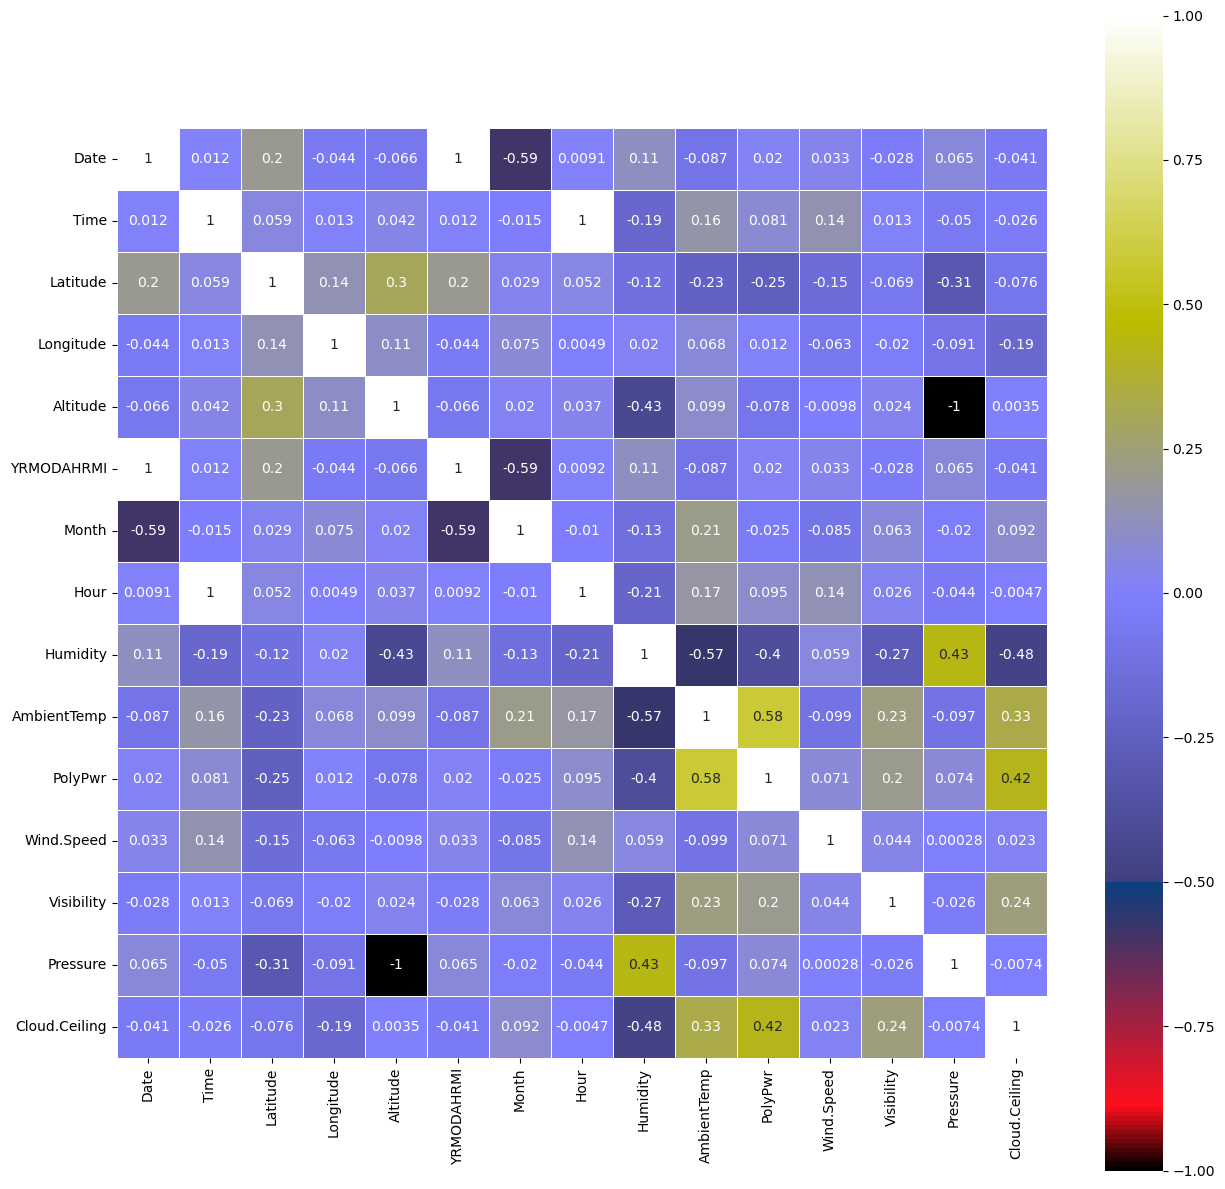

In [9]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1,cmap= 'gist_stern',annot=True,linewidth=0.5,square=True)
plt.show()

>>## Pre-Processing ##

### Train / Test Split ###

In [12]:
# X, y
y = df.loc[:,'PolyPwr']
X = df.drop(labels = 'PolyPwr', axis=1)

# train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##### Dropped Column DF #####

In [13]:
y_drop = df.loc[:,'PolyPwr']
X = df.drop(labels = 'PolyPwr', axis=1)


In [14]:
print(f"test: {X_test.shape}")
print(f"train: {X_train.shape}")


test: (4209, 16)
train: (16836, 16)


### One Hot Encoding  / Drop ###


#### Train #####

In [15]:
# OHE - 
# Season                                                                                           
dum_season = pd.get_dummies(X_train.loc[:,'Season'], dtype='int64')       # APPLY METHOD TO COLUMN -> SAVE AS DUM
X_train = pd.concat((X_train,dum_season), axis = 1)                       # ADD new COLUMNS                                           
X_train.drop('Season', axis=1,inplace=True)                               # DROP old COLUMN 


# DROP - 
# Location
X_train.drop('Location', axis=1,inplace=True)
# Longitude
X_train.drop('Longitude', axis=1,inplace=True)
# Altitude
X_train.drop('Altitude', axis=1,inplace=True)
# YRMODAHRMI
X_train.drop('YRMODAHRMI', axis=1,inplace=True)

#### Test #####

In [16]:
# OHE - 
# Season
dum_season = pd.get_dummies(X_test.loc[:,'Season'], dtype='int64')     
X_test = pd.concat((X_test,dum_season), axis = 1)
X_test.drop('Season', axis=1,inplace=True)                               

# DROP - 
# Location                                                                   
X_test.drop('Location', axis=1,inplace=True)
# Longitude
X_test.drop('Longitude', axis=1,inplace=True)
# Altitude
X_test.drop('Altitude', axis=1,inplace=True)
# YRMODAHRMI
X_test.drop('YRMODAHRMI', axis=1,inplace=True)

##### Column Index ######

In [17]:
columns= {}
for i in range(len(X_train.columns)):
     columns[i] = X_train.columns[i]
columns = pd.DataFrame.from_dict(columns,orient='index')    
columns

,0
0,Date
1,Time
2,Latitude
3,Month
4,Hour
5,Humidity
6,AmbientTemp
7,Wind.Speed
8,Visibility
9,Pressure


### Scaler ###

In [18]:
scaler = StandardScaler()

### Code Functions

#### Cross Validator ###

In [19]:
cv = KFold(n_splits = 3, shuffle=True)

#### Pipelines ####

In [20]:
pipes = {}
def add_pipe(pipe, name):
    if name in pipes.keys():
        print(f"A pipe called '{name}' already exists!")
        new_name = input("Enter another name:]")
        pipes[f"{new_name}"] = pipe
        print(f"'{new_name}' added to 'pipes'")
    else:
        pipes[f'{name}'] = pipe
        print(f"'{name}' added to 'pipes'")

#### Learning Curves ####

In [21]:
def plot_lc(model):
    metrics =  [['MAE', 'neg_mean_absolute_error'],['RMSE','neg_root_mean_squared_error'], ['R2','r2']]
    for i in range(len(metrics)):
        print(f'Scoring Measure: {metrics[i][0]}')
        plot_learning_curve(pipes[model], X_train_sel, y_train, cv=cv, n_jobs=-1, scoring=metrics[i][1])
        plt.show();
       

#### Add Scores ####

In [22]:
scores = {}
def add_scores(score, model):
    if model in scores.keys():
        print(f"A pipe called '{model}' already exists!")
        new_model = input("Enter another model name :] ")
        scores[f"{new_model}"] = score
        print(f"'{new_model}' added to 'scores'")
    else:
        scores[f'{model}'] = scores
        print(f"'{model}' added to 'scores'")

>>## Continued Data Analysis ##

#### Shapes

In [23]:
shapes = f"X shape = {X.shape}, y shape =  {y.shape}, \n\
X_train shape = {X_train.shape} y_train shape = {y_train.shape} \n\
X_test shape = {X_test.shape}, y_test.shape = {y_test.shape}"
print(shapes)

X shape = (21045, 16), y shape =  (21045,), 
X_train shape = (16836, 15) y_train shape = (16836,) 
X_test shape = (4209, 15), y_test.shape = (4209,)


#### Modified Dataframe ####
( For 2nd Heat Map )

In [24]:
#  CREATE DF SANS DROP COLUMNS

# OHE - 
# Season                                                                                           
dum_season = pd.get_dummies(X.loc[:,'Season'], dtype='int64')       # APPLY METHOD TO COLUMN -> SAVE AS DUM
df_mod = pd.concat((df,dum_season), axis = 1)                       # ADD new COLUMNS                                           
df_mod.drop('Season', axis=1,inplace=True)                               # DROP old COLUMN 


# DROP - 
# Location
df_mod.drop('Location', axis=1,inplace=True)
# Longitude
df_mod.drop('Longitude', axis=1,inplace=True)
# Altitude
df_mod.drop('Altitude', axis=1,inplace=True)
# YRMODAHRMI
df_mod.drop('YRMODAHRMI', axis=1,inplace=True)

#### 2nd Heat Map

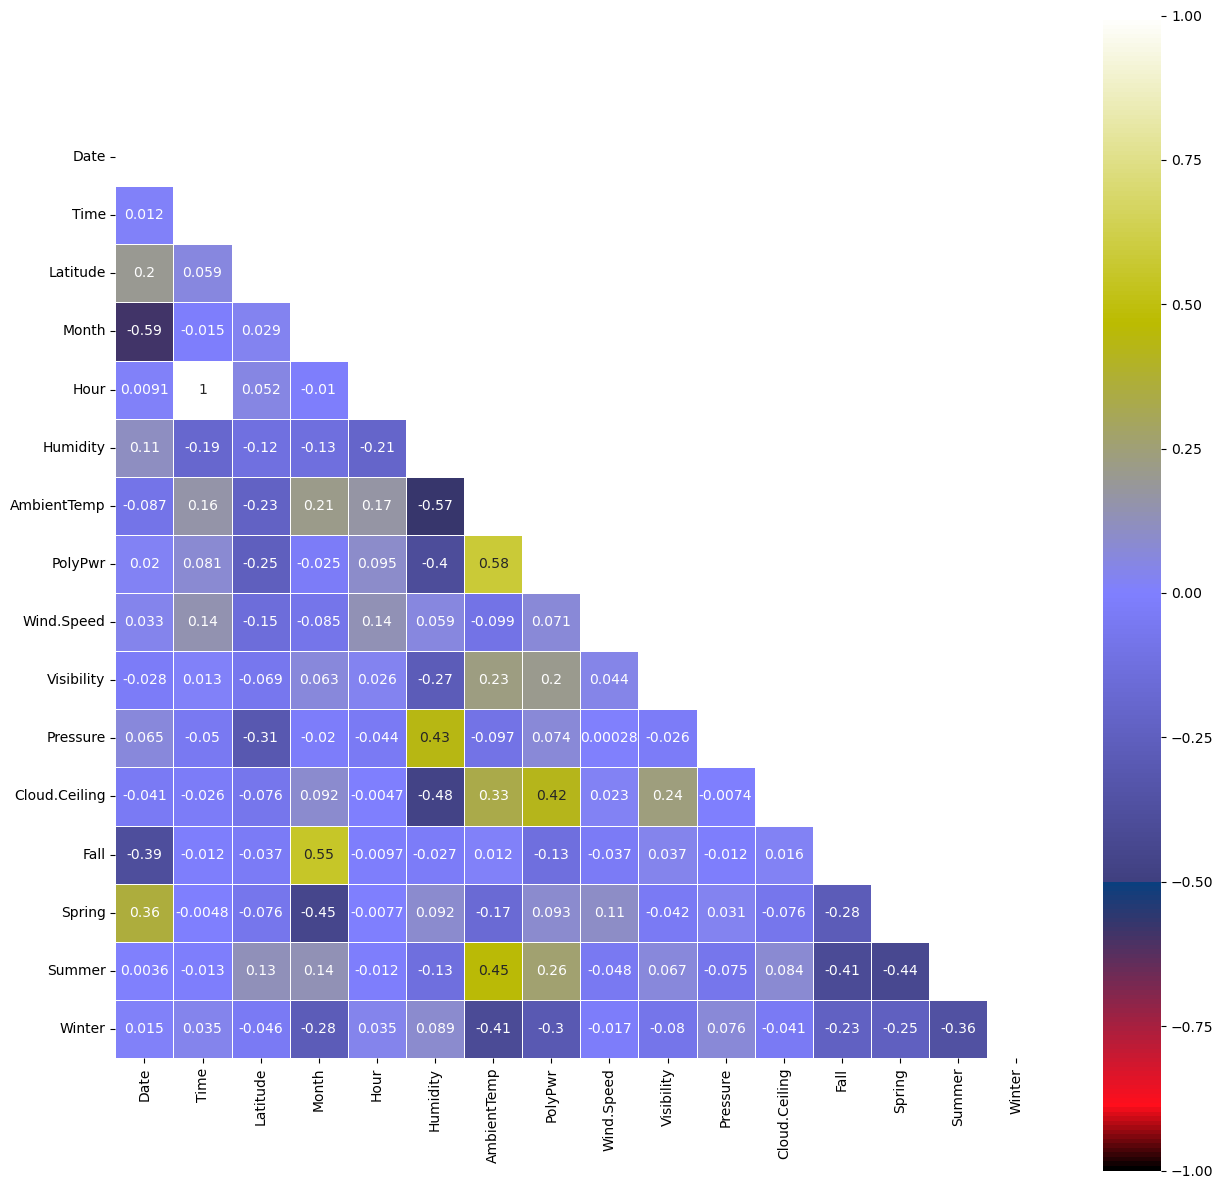

In [25]:
# Correlation object
corr= df_mod.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# PLOT
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1,cmap= 'gist_stern',annot=True,linewidth=0.5,square=True,mask=matrix)
plt.show();


>>## Feature Selection ##

>### Recursive Feature Elimination ###  
>###### ( RFE ) #####

#### Pipeline  ####

>Model

In [26]:
etr = ExtraTreesRegressor()

>Pipeline

In [27]:
rfe = RFE(etr)
pipe_rfe = Pipeline([('scaler', StandardScaler()),('rfe',rfe),('etr',etr)])
add_pipe(pipe_rfe, 'rfe')

'rfe' added to 'pipes'


#### Learning Curve ####

In [28]:
plot_learning_curve(pipe_rfe,X_train,y_train, title="RFE Learning Curve", cv=cv, n_jobs=-1,scoring='r2');

NameError: name 'plot_learning_curve' is not defined

#### Cross Validate RFE Pipeline

In [29]:
rfe_score = cross_val_score(pipe_rfe, X_train, y_train, cv=cv, n_jobs=-1)
np.mean(rfe_score)

0.6322434202909214

###### Get Feature Importances

In [30]:
#    FIT
pipe_rfe.fit(X_train, y_train)                     

#    ATTR KEY
attribute_rfe = pipe_rfe.named_steps.etr           
support = pipe_rfe.named_steps['rfe'].support_

#    GET IMPORTANCES
feature_importances = pipe_rfe.named_steps['etr'].feature_importances_

#    RANKING DF
f = support
rfe_ranking = pd.DataFrame(support,index=X_train.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
 

##### Display Scores

In [31]:
rfe_score

array([0.63703596, 0.62715171, 0.63254259])

##### Display Importances

In [32]:
for name, importance in zip(X_train.loc[:,:], feature_importances):
    print(name, "=", importance)

Date = 0.09377073526529849
Time = 0.08908501087195367
Latitude = 0.14222967814091633
Month = 0.12172336890446218
Hour = 0.28982313094609136
Humidity = 0.09894115140236265
AmbientTemp = 0.1644269244689152


##### Plot Importances

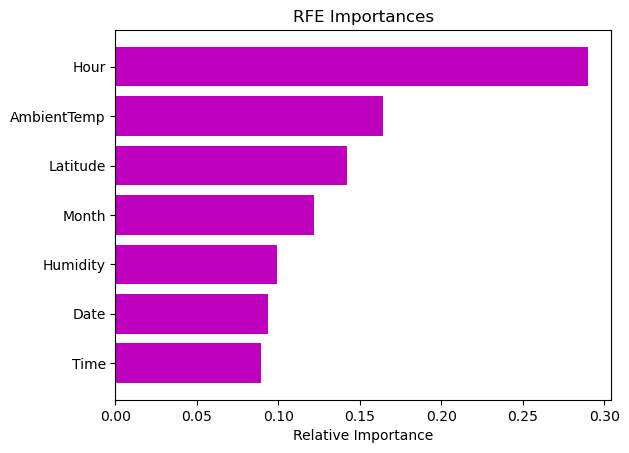

In [33]:
features = X_train.columns
importances = feature_importances
indices = np.argsort(importances)

plt.title('RFE Importances')
plt.barh(range(len(indices)), importances[indices], color='m', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

indices = np.argsort(importances)

>### Recursive Feature Extraction w/ Cross Validation ###
>###### ( RFECV ) #####

#### Pipeline

>Model

In [34]:
etr_2 = ExtraTreesRegressor()

>Build / Add Pipe

In [35]:
rfecv = RFECV(etr_2)
pipe_rfecv = Pipeline([('scaler', StandardScaler()),('rfecv',rfecv),('etr_2',etr_2)])
add_pipe(pipe_rfecv, 'rfecv')

'rfecv' added to 'pipes'


#### Learning Curve ####

In [36]:
plot_learning_curve(pipe_rfecv,X_train,y_train, title="RFECV Learning Curve", cv=cv, n_jobs=-1,scoring='r2');

NameError: name 'plot_learning_curve' is not defined

##### Get Feature Importances

In [37]:
#    Taken from Sklearn: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
min_features_to_select = 1

#    FIT
pipe_rfecv.fit(X_train, y_train)                                                          

#    ATTR KEY
attribute_rfecv = pipe_rfecv.named_steps.etr_2           
support_2 = pipe_rfecv.named_steps['rfecv'].support_

#    GET IMPORTANCES
feature_importances_2 = pipe_rfecv.named_steps['etr_2'].feature_importances_

#    RANKING DF
f = support_2
rfecv_ranking = pd.DataFrame(support,index=X_train.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 10


#### Plot n_Features vs. CV Scores #####

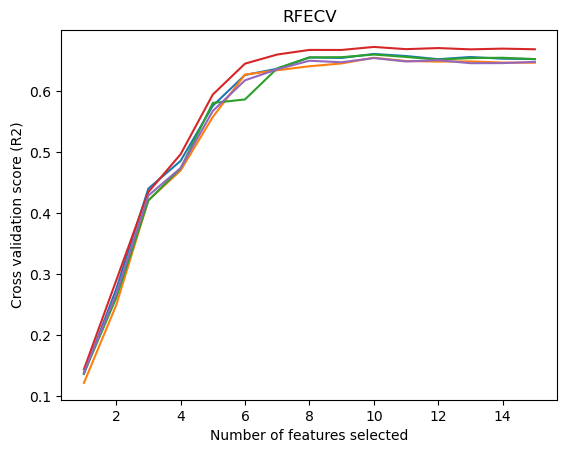

In [39]:
min_features_to_select = 1
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (R2)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.title("RFECV")
plt.show();

##### Display Importances

In [40]:
for name, importance in zip(X_train.loc[:,:], feature_importances_2):
    print(name, "=", importance)

Date = 0.06047242333750211
Time = 0.08607578536955107
Latitude = 0.09275283294785673
Month = 0.07768576139147285
Hour = 0.097548025808536
Humidity = 0.2375397865567736
AmbientTemp = 0.051220085468014556
Wind.Speed = 0.07510194269942472
Visibility = 0.15950371820656983
Pressure = 0.06209963821429851


##### Plot Importances

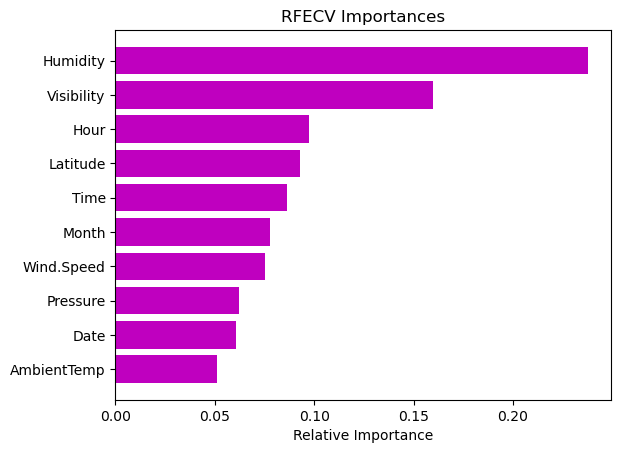

In [41]:
features = X_train.columns
importances = feature_importances_2
indices = np.argsort(importances)

plt.title('RFECV Importances')
plt.barh(range(len(indices)), importances[indices], color='m', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


indices = np.argsort(importances)

### Transform Data

>TRAINING

In [42]:
# FIT
pipe_rfecv.fit(X_train, y_train)
# ATTR KEY
attribute_rfecv = pipe_rfecv.named_steps.rfecv            
f = attribute_rfecv.get_support(1)
# transform
X_train_sel = X_train[X_train.columns[f]]           

In [43]:
X_train_sel.columns

Index(['Date', 'Time', 'Latitude', 'Month', 'Humidity', 'AmbientTemp',
       'Wind.Speed', 'Pressure', 'Cloud.Ceiling', 'Winter'],
      dtype='object')

>TEST

In [44]:
X_train.columns[f]

Index(['Date', 'Time', 'Latitude', 'Month', 'Humidity', 'AmbientTemp',
       'Wind.Speed', 'Pressure', 'Cloud.Ceiling', 'Winter'],
      dtype='object')

In [45]:
X_test_sel = X_test[X_train.columns[f]]           # transform

In [46]:
X_test_sel.columns

Index(['Date', 'Time', 'Latitude', 'Month', 'Humidity', 'AmbientTemp',
       'Wind.Speed', 'Pressure', 'Cloud.Ceiling', 'Winter'],
      dtype='object')

#### New Column Index ######

In [47]:
columns_sel = {}
for i in range(len(X_train_sel.columns)):
     columns_sel[i] = X_train_sel.columns[i]
columns_sel = pd.DataFrame.from_dict(columns_sel,orient='index')    
columns_sel

,0
0,Date
1,Time
2,Latitude
3,Month
4,Humidity
5,AmbientTemp
6,Wind.Speed
7,Pressure
8,Cloud.Ceiling
9,Winter


##### Pair Plot

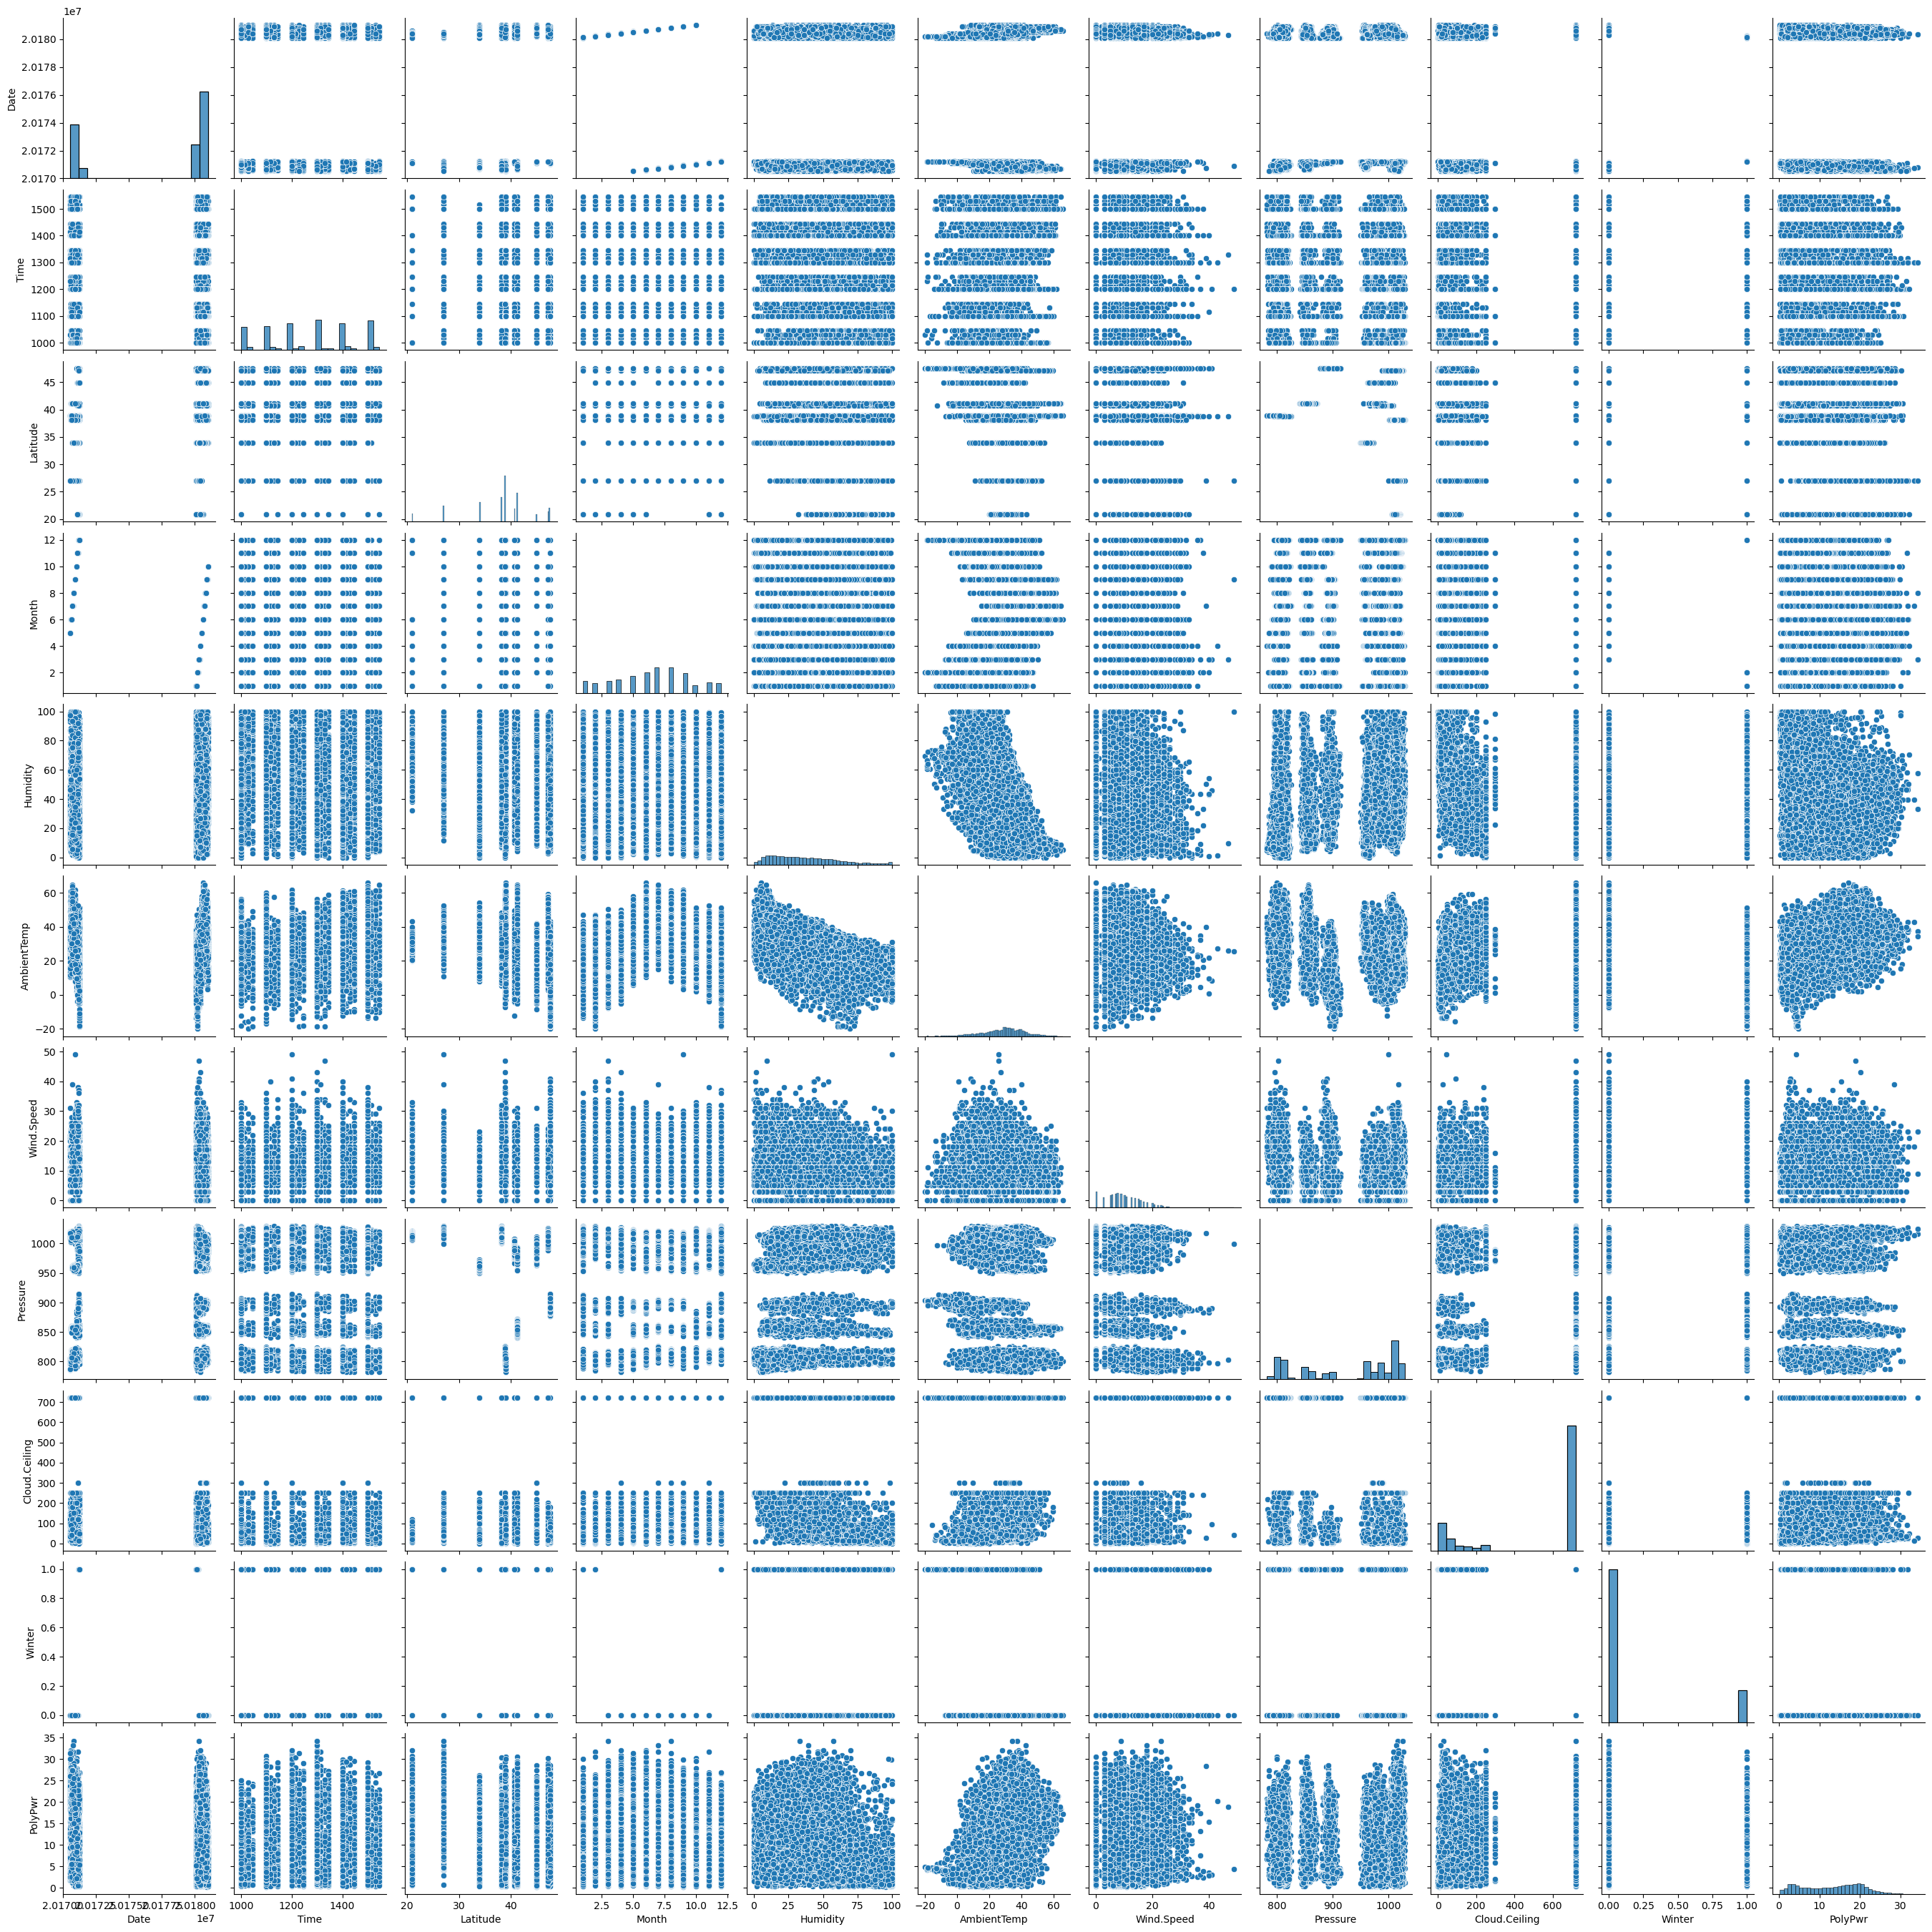

In [48]:
df_train_sel = pd.concat((X_train_sel,y_train), axis = 1)
sns.pairplot(df_train_sel);



>>## Models ##

>### Dummy Regressor ###  
>*( Baseline )*

#### Model ####

In [49]:
dummy = DummyRegressor()

#### Pipeline ####

In [50]:
pipe_dummy = Pipeline([('scaler', StandardScaler()),('dummy', DummyRegressor())])
add_pipe(pipe_dummy, 'dummy')

'dummy' added to 'pipes'


> #### Learning Curve ####

In [51]:
plot_lc('dummy')

Scoring Measure: MAE


NameError: name 'plot_learning_curve' is not defined

#### Cross Validation #### 

In [52]:
score_dummy = cross_val_predict(pipe_dummy, X_train_sel, y_train, cv = cv,n_jobs=-1)

> #### KFold Validation ####

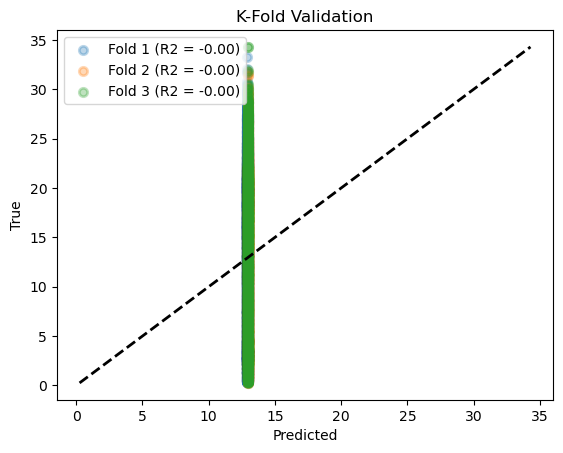

In [53]:
scores_ = []
fig = plt.figure()
i = 1
for train, test in cv.split(X_train_sel, y_train):
    model = DummyRegressor()
    prediction = pipe_dummy.fit(X_train_sel.iloc[train], y_train.iloc[train]).predict(X_train_sel.iloc[test])
    true = y_train.iloc[test]
    score = r2_score(true, prediction)
    scores_.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1

plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()


### Test: Dummy ###


#### Initiate Model ####

In [54]:
test_dummy = pipes['dummy']

#### Fit ####

In [55]:
test_dummy.fit(X_train_sel, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dummy', DummyRegressor())])

##### Predict #####

In [56]:
pred_dummy = test_dummy.predict(X_test_sel)

##### Scores

> Store Scores  

In [57]:
dummy_mae = mean_absolute_error(y_test, pred_dummy)
dummy_rmse = mean_squared_error(y_test, pred_dummy, squared=False)
dummy_r2 = r2_score(y_test, pred_dummy)
dummy_ev = explained_variance_score(y_test, pred_dummy)

dummy_scores = {"MAE":dummy_mae,
             "RMSE":dummy_rmse,
             "R2":dummy_r2,
               "Expl_Var":dummy_ev}

> Display Score 

In [58]:
print("Scores for Dummy Model:")
print()
for k,v in dummy_scores.items():
    print(f"{k:<9}:{(str(round(v, 3))):>6}")
    

Scores for Dummy Model:

MAE      :  6.22
RMSE     : 7.186
R2       :-0.001
Expl_Var :   0.0


> Add Results to 'scores'

In [59]:
add_scores(dummy_scores, 'Dummy')

'Dummy' added to 'scores'


##### Display Results #####

In [60]:
print("Scores for SGD Model:")
print()
for k,v in dummy_scores.items():
    print(f"{k:<9}:{(str(round(v, 3))):>6}")
    

Scores for SGD Model:

MAE      :  6.22
RMSE     : 7.186
R2       :-0.001
Expl_Var :   0.0


##### Plot Predictions vs True

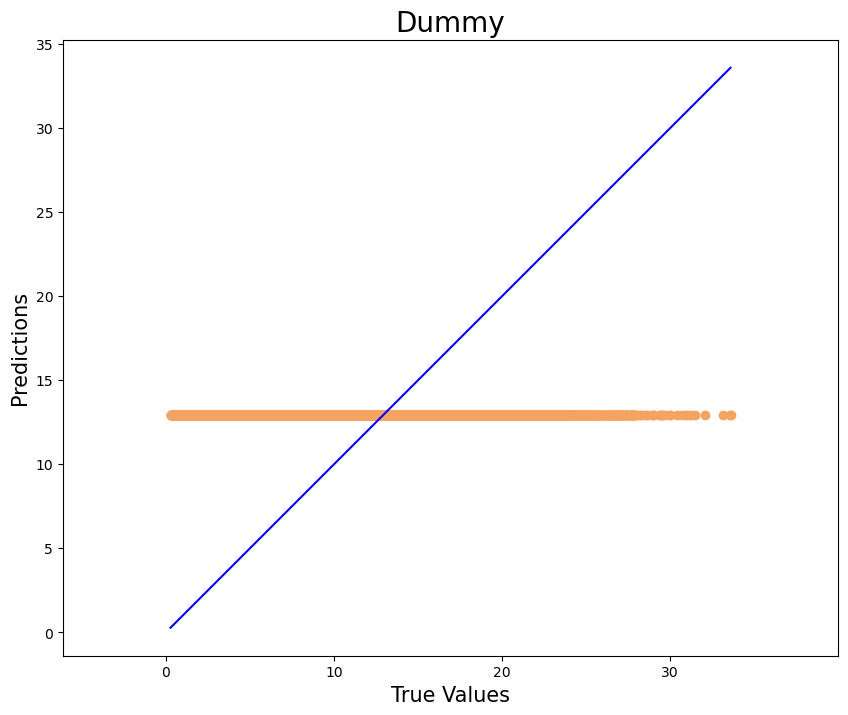

In [61]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, pred_dummy, c='sandybrown')
plt.title("Dummy", fontsize=20)
p1 = max(max(pred_dummy), max(y_test))
p2 = min(min(pred_dummy), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### Plot Residuals

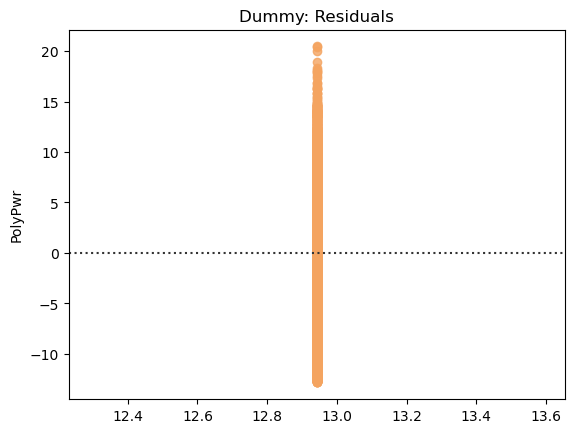

In [62]:
sns.residplot(x=pred_dummy, y=y_test,data=X_test_sel,color='sandybrown')
plt.title("Dummy: Residuals");

##### JointPlot

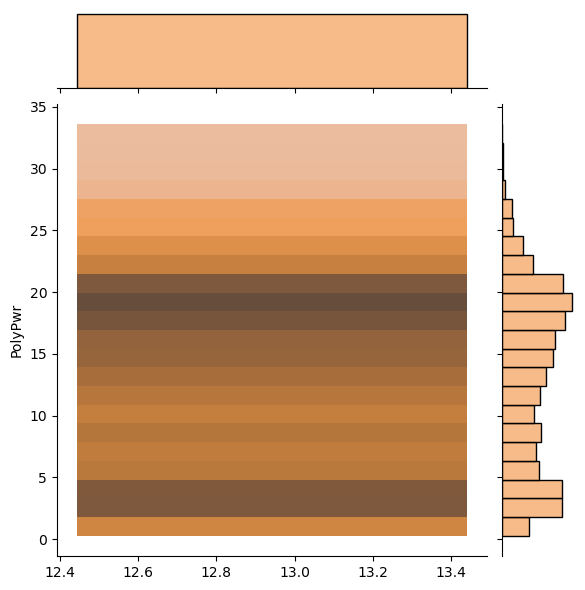

In [63]:
sns.jointplot(x=pred_dummy, y=y_test, data=X_test_sel, kind="hist", color='sandybrown');

>### RandomForest ###
>##### ( Linear Regression ) #####

#### Model ####

In [64]:
rfr = RandomForestRegressor(n_estimators=50)

#### Pipeline  ####

In [65]:
pipe_rfr = Pipeline([('scaler', StandardScaler()), ('rfr', rfr)])
add_pipe(pipe_rfr, 'rfr')

'rfr' added to 'pipes'


 #### Learning Curve  ####

In [66]:
plot_lc('rfr')

Scoring Measure: MAE


NameError: name 'plot_learning_curve' is not defined

Perform Cross-validation on training data for hyper-parameter tuning   
( The following code is from Olaowe. )

## Fit Random Search Model #####

The next takes 10+ hours to run. 

To conitune with the saved results, 

skip down to the cell that reads: "SKIP-TO-POINT"

#### Hyper-parameters to Tune ###


In [67]:
n_estimators_list = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]
max_features_list = ['auto', 'sqrt']
max_depth_list = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth_list.append(None)
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 4]
bootstrap_list = [True, False]

##### Dictionary of Parameters ####


In [68]:
grid_rfr = {'rfr__n_estimators': n_estimators_list,
           'rfr__max_features': max_features_list,
           'rfr__max_depth': max_depth_list,
           'rfr__min_samples_split': min_samples_split_list,
           'rfr__min_samples_leaf': min_samples_leaf_list,
           'rfr__bootstrap': bootstrap_list}

##### Create Random Search #####


In [69]:
rcv_rfr = RandomizedSearchCV(estimator=pipe_rfr, param_distributions=grid_rfr, 
                                 n_iter=500, cv=3, verbose=2, random_state=42, 
                                 n_jobs=-1)


In [70]:
%%time

rcv_rfr.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


#### RCV Results: RFR ####

CPU times: user 23.8 s, sys: 1.98 s, total: 25.8 s
Wall time: 4h 26min 56s
RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rfr',
                                              RandomForestRegressor(n_estimators=50))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'rfr__bootstrap': [True, False],
                                        'rfr__max_depth': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           110, None],
                                        'rfr__max_features': ['auto', 'sqrt'],
                                        'rfr__min_samples_leaf': [1, 2, 4],
                                        'rfr__min_samples_split': [2, 5, 10],
                                        'rfr__n_estimators': [100, 109, 118,
                                                              127, 136, 145,
                                                              154, 163, 172,
                                                              181, 190, 200,
                                                              209, 218, 227,
                                                              236, 245, 254,
                                                              263, 272, 281,
                                                              290, 300, 309,
                                                              318, 327, 336,
                                                              345, 354, 363, ...]},
                   random_state=42, verbose=2)

##### Best Estimator
( skip )

In [ ]:
best_rfr = rcv_rfr.best_estimator_

##### RCV Scores

In [ ]:
mean_score_rfr = rcv_rfr.cv_results_['mean_test_score']
std_score_rfr = rcv_rfr.cv_results_['std_test_score']
params_rfr = rcv_rfr.cv_results_['params']

In [ ]:
cv_score_df = pd.DataFrame(params_rfr)
cv_score_df['mean_score_rfr'] = mean_score_rfr
cv_score_df['std_score_rfr'] = std_score_rfr

In [ ]:
breakdown_rfr = {"Index": rcv_rfr.best_index_,
"Params" : rcv_rfr.best_params_,
"Estimator" : rcv_rfr.best_estimator_,
"Score" : rcv_rfr.best_score_}

##### Run Cell to use saved Hyper-Parameters 

> SKIP-TO-POINT

In [ ]:
best_rfr = Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 RandomForestRegressor(bootstrap=False, max_depth=30,
                                       max_features='sqrt',
                                       min_samples_split=10,
                                       n_estimators=554))])

##### Add Best Estimator to Pipes #####

In [ ]:
add_pipe(Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 best_rfr)]), "best_rfr")


#### K-Fold Scores ####

In [ ]:
scores_ = []
colors = ['midnightblue', 'springgreen', 'goldenrod']
fig = plt.figure()
i = 0
for train, test in cv.split(X_train_sel, y_train):
    model = pipes['best_rfr']
    prediction = pipe_rfr.fit(X_train_sel.iloc[train], y_train.iloc[train]).predict(X_train_sel.iloc[test])
    true = y_train.iloc[test]
    score = r2_score(true, prediction)
    scores_.append(score)
    plt.scatter(prediction, true, c=colors[i],lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1

plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RFR K-Fold Validation (R2)')
plt.legend()
plt.show()

### Test: RFR ###


#### Initiate Model ####

In [ ]:
test_rfr = pipes['best_rfr']

#### Fit ####

In [ ]:
test_rfr.fit(X_train_sel, y_train)

##### Predict #####

In [ ]:
pred_rfr = test_rfr.predict(X_test_sel)

##### Scores

> Store Scores  

In [ ]:
rfr_mae = mean_absolute_error(y_test, pred_rfr)
rfr_rmse = mean_squared_error(y_test, pred_rfr, squared=False)
rfr_r2 = r2_score(y_test, pred_rfr)
rfr_ev = explained_variance_score(y_test.ravel(), pred_rfr)

rfr_scores = {"MAE":rfr_mae,
             "RMSE":rfr_rmse,
             "R2":rfr_r2,
             "Expl_Var":rfr_ev}

> Add to 'scores' 

In [ ]:
add_scores(rfr_scores, 'RFR')

##### Display Results #####

In [ ]:
print("Scores for RFR Model:")
print()
for k,v in rfr_scores.items():
    print(f"{k:<9}:{(str(round(v, 3))):>6}")

##### Plot Predictions vs True

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, pred_rfr, c='darkgreen')
plt.title("RFR", fontsize=20)
p1 = max(max(pred_rfr), max(y_test))
p2 = min(min(pred_rfr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### Plot Residuals

In [ ]:
sns.residplot(x=pred_rfr, y=y_test,data=X_test_sel,color='darkgreen')
plt.title("RFR: Residuals");

##### JointPlot

In [ ]:
sns.jointplot(x=pred_rfr, y=y_test, data=X_test_sel, kind="hist", color='darkgreen')


>### SGD ###  
>##### ( Linear Regression ) #####

#### Model ####

In [ ]:
sgd = SGDRegressor(loss='squared_loss',
                   penalty= 'l2',
                   alpha = 0.01,
                   max_iter = 4500,
                   learning_rate = "optimal",
                   eta0 = 0.01)

#### Pipeline ####



In [ ]:
pipe_sgd = Pipeline([('scaler', StandardScaler()), ('sgd', sgd)])
add_pipe(pipe_sgd, 'sgd')

 #### Learning Curve  ####

In [ ]:
plot_lc('sgd');

In [ ]:
plot_validation_curve(pipe_sgd, X_train_sel, y_train, cv=cv, param_name='sgd__alpha',param_range=(0.00001,0.1,0.0001),scoring='r2');

## Fit Random Search Model #####

The next few cells take time to run. 

To conitune with the saved results, 

skip down to the cell that reads: "SKIP-TO-POINT"

#### Hyper-Parameters to Tune ####

In [ ]:
loss = ['squared_loss','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
eta0 = [1, 10, 100]
average = [True, False]

#### Dictionary of Parameters ####

In [ ]:
grid_sgd = {'sgd__loss':loss,
           'sgd__penalty':penalty,
           'sgd__alpha':alpha,
           'sgd__learning_rate':learning_rate,
           'sgd__average':average,
           'sgd__eta0':eta0} 

#### Create Random Search ####


In [ ]:
rcv_sgd = RandomizedSearchCV(estimator=pipe_sgd, param_distributions=grid_sgd, 
                                 n_iter=1500, cv=3, verbose=2, n_jobs=-1)

#### Fit the Random Search Model ####

In [ ]:
%%time

rcv_sgd.fit(X_train, y_train)

CPU times: user 19.6 s, sys: 2.78 s, total: 22.3 s
Wall time: 14min 44s
RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('sgd',
                                              SGDRegressor(alpha=0.01,
                                                           learning_rate='optimal',
                                                           max_iter=4500))]),
                   n_iter=1500, n_jobs=-1,
                   param_distributions={'sgd__alpha': [0.0001, 0.001, 0.01, 0.1,
                                                       1, 10, 100, 1000],
                                        'sgd__average': [True, False],
                                        'sgd__eta0': [1, 10, 100],
                                        'sgd__learning_rate': ['constant',
                                                               'optimal',
                                                               'invscaling',
                                                               'adaptive'],
                                        'sgd__loss': ['squared_loss', 'huber',
                                                      'epsilon_insensitive',
                                                      'squared_epsilon_insensitive'],
                                        'sgd__penalty': ['l1', 'l2',
                                                         'elasticnet']},
                   verbose=2)

##### Best Estimator
( Skip )

In [ ]:
best_sgd = rcv_sgd.best_estimator_


##### CV Scores

In [ ]:
mean_score_sgd = rcv_sgd.cv_results_['mean_test_score']
std_score_sgd = rcv_sgd.cv_results_['std_test_score']
params_sgd = rcv_sgd.cv_results_['params']

In [ ]:
cv_score_df = pd.DataFrame(params_sgd)
cv_score_df['mean_score_sgd'] = mean_score_sgd
cv_score_df['std_score_sgd'] = std_score_sgd

In [ ]:
breakdown_sgd = {"Index": rcv_sgd.best_index_,
"Params" : rcv_sgd.best_params_,
"Estimator" : rcv_sgd.best_estimator_,
"Score" : rcv_sgd.best_score_}

##### Run Cell to use saved Hyper-Parameters 

> SKIP-TO-POINT

In [ ]:
best_sgd = SGDRegressor(eta0=1, learning_rate='adaptive',
            loss='squared_epsilon_insensitive', 
            max_iter=4500, penalty='elasticnet')

#### Add to Pipes ####

In [ ]:
add_pipe(Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', best_sgd)]), 'best_sgd')

#### Learning Curves ####

In [ ]:
plot_lc('best_sgd')

#### K-Fold Scores ####

In [ ]:
scores_ = []
colors = ['midnightblue', 'springgreen', 'goldenrod']
fig = plt.figure()
i = 0
for train, test in cv.split(X_train_sel, y_train):
    model = pipes['best_sgd']
    prediction = pipe_sgd.fit(X_train_sel.iloc[train], y_train.iloc[train]).predict(X_train_sel.iloc[test])
    true = y_train.iloc[test]
    score = r2_score(true, prediction)
    scores_.append(score)
    plt.scatter(prediction, true, c=colors[i],lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1

plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SGD K-Fold Validation (R2)')
plt.legend()
plt.show()

### Test: SGD ###


#### Initiate Model ####

In [ ]:
test_sgd = pipes['best_sgd']

#### Fit ####

In [ ]:
test_sgd.fit(X_train_sel, y_train)

##### Predict #####

In [ ]:
pred_sgd = test_sgd.predict(X_test_sel)

##### Scores

> Store Scores

In [ ]:
sgd_mae = mean_absolute_error(y_test, pred_sgd)
sgd_rmse = mean_squared_error(y_test, pred_sgd, squared=False)
sgd_r2 = r2_score(y_test, pred_sgd)
sgd_ev = explained_variance_score(y_test, pred_sgd)

sgd_scores = {"MAE":sgd_mae,
             "RMSE":sgd_rmse,
             "R2":sgd_r2,
             "Expl_Var":sgd_ev}

> Display Scores

In [ ]:
sgd_scores

> Add to 'scores'

In [ ]:
add_scores(sgd_scores, 'SGD')

##### Display Results #####

In [ ]:
print("Scores for SGD Model:")
print()
for k,v in sgd_scores.items():
    print(f"{k:<9}:{(str(round(v, 3))):>6}")
    

##### Plot Predictions vs. True

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, pred_sgd, c='m')
plt.title("SGD", fontsize=20)
p1 = max(max(pred_sgd), max(y_test))
p2 = min(min(pred_sgd), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### Plot Residuals

In [ ]:
sns.residplot(x=pred_sgd, y=y_test,data=X_test_sel,color='m')
plt.title("SGD: Residuals");

##### JointPlot

In [ ]:
sns.jointplot(x=pred_sgd, y=y_test, data=X_test_sel, kind="hist", color='m');

>### MLP ###  
>#### ( Neural Network ) ####

#### Model ####

In [ ]:
mlp = MLPRegressor()

#### Pipeline ####



In [ ]:
pipe_mlp = Pipeline([('scaler', StandardScaler()), ('mlp', mlp)])
add_pipe(pipe_mlp, 'mlp')

 #### Learning Curve  ####

In [ ]:
plot_lc('mlp')

## Fit Random Search Model #####

The next few cells take time to run. 

To conitune with the saved results, 

skip down to the cell that reads: "SKIP-TO-POINT"

### Hyper-parameters to Tune ###

In [ ]:
hidden_layer_sizes = [(50,50,50), (50,100,50)]
activation = ['identity', 'logistic', 'tanh', 'relu'],
solver = ['lbfgs', 'sgd', 'adam']
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant','adaptive']

#### Dictionary of Parameters ####


In [ ]:
grid_mlp = {'mlp__hidden_layer_sizes': hidden_layer_sizes,
            'mlp__solver': solver,
            'mlp__alpha': alpha,
            'mlp__learning_rate': learning_rate}

#             'mlp__activation': activation,

#### Create Random Search ####


In [ ]:
rcv_mlp = RandomizedSearchCV(estimator=pipe_mlp, param_distributions=grid_mlp, 
                                 n_iter=1500, cv=cv, verbose=2, n_jobs=-1)

#### Fit the random search model ####

    ( Note: The RCV fitting takes a long time. 
      Below following cell is an estimator saved from a previous fit. ) 

In [ ]:
%%time

rcv_mlp.fit(X_train, y_train)

##### Best Estimator #####
This estimator has been saved from a previous run.

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(alpha=10, hidden_layer_sizes=(50, 100, 50),
                              learning_rate='adaptive', solver='sgd'))])

##### Best Estimator

In [ ]:
best_mlp = rcv_mlp.best_estimator_


##### CV Scores

In [ ]:
mean_score_mlp = rcv_mlp.cv_results_['mean_test_score']
std_score_mlp = rcv_mlp.cv_results_['std_test_score']
params_mlp = rcv_mlp.cv_results_['params']

In [ ]:
cv_score_df = pd.DataFrame(params_mlp)
cv_score_df['mean_score_mlp'] = mean_score_mlp
cv_score_df['std_score_mlp'] = std_score_mlp

In [ ]:
breakdown_mlp = {"Index": rcv_mlp.best_index_,
"Params" : rcv_mlp.best_params_,
"Estimator" : rcv_mlp.best_estimator_,
"Score" : rcv_mlp.best_score_}

##### Run Cell to use saved Hyper-Parameters 

> SKIP-TO-POINT

In [ ]:
best_mlp = MLPRegressor(alpha=10, hidden_layer_sizes=(50, 100, 50),
            learning_rate='adaptive', solver='sgd')

In [ ]:
add_pipe(Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',best_mlp)]),'best_mlp')


In [ ]:
print("    Before:")
print(pipes['mlp'])
print()
print("    After:")
print(pipes['best_mlp'])

#### K-Fold Scores ####

In [ ]:
scores_ = []
colors = ['midnightblue', 'springgreen', 'goldenrod']
fig = plt.figure()
i = 0
for train, test in cv.split(X_train_sel, y_train):
    model = pipes['best_mlp']
    prediction = pipe_mlp.fit(X_train_sel.iloc[train], y_train.iloc[train]).predict(X_train_sel.iloc[test])
    true = y_train.iloc[test]
    score = r2_score(true, prediction)
    scores_.append(score)
    plt.scatter(prediction, true, c=colors[i],lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1

plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MLP K-Fold Validation (R2)')
plt.legend(dd)
plt.show()

### Test: MLP ###


#### Initiate Model ####

In [ ]:
test_mlp = pipes['best_mlp']

#### Fit ####

In [ ]:
test_mlp.fit(X_train_sel, y_train)

##### Predict #####

In [ ]:
pred_mlp = test_mlp.predict(X_test_sel)


##### Scores

> Store Scores

In [ ]:
mlp_mae = mean_absolute_error(y_test, pred_mlp)
mlp_rmse = mean_squared_error(y_test, pred_mlp, squared=False)
mlp_r2 = r2_score(y_test, pred_mlp)
mlp_ev = explained_variance_score(y_test, pred_mlp)

mlp_scores = {"MAE":mlp_mae,
             "RMSE":mlp_rmse,
             "R2":mlp_r2,
             "Expl_Var":mlp_ev}

> Display Scores

In [ ]:
print("Scores for MLP Model:")
print()
for k,v in mlp_scores.items():
    print(f"{k:<9}:{(str(round(v, 3))):>6}")
    

> Add to 'scores'

In [ ]:
add_scores(mlp_scores, 'MLP')

##### Display Results #####

In [ ]:
print("Scores for MLP Model:")
print()
for k,v in mlp_scores.items():
    print(f"{k:<9}:{(str(round(v, 3))):>6}")
    

##### Plot Predictions vs True

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, pred_mlp, c='darkcyan')
plt.title("MLP", fontsize=20)
p1 = max(max(pred_mlp), max(y_test))
p2 = min(min(pred_mlp), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### JointPlot

In [ ]:
sns.jointplot(x=pred_mlp, y=y_test, data=X_test_sel, kind="hist", color='darkcyan');

##### Plot Residuals

In [ ]:
sns.residplot(x=pred_mlp, y=y_test,data=X_test_sel,color='darkcyan')
plt.title("MLP: Residuals");

>>## Scores ##

In [ ]:
for k,v in scores.items():
#     mlp_scores
#     print(k)
    n_score = f"{k}_scores"
scores
#     print(type(n_score))
#     n_score.items():

In [ ]:
print("Mean Scores")
print()
print(f"True:  {str(round(y_test.mean(),2))}")
print()
print(f"RFR:  {str(round(pred_rfr.mean(),2))}")
print(f"SGD:  {str(round(pred_sgd.mean(),2))}")
print(f"MLP:  {str(round(pred_mlp.mean(),2))}")

#### Display Scores ####
This is currently filtering out the Explained Variance Score.

To turn filter off:
1. Comment out the if/else statement.
2. Comment in the print statement: "filter switch".

In [ ]:
scores = {"Dummy":dummy_scores, "RFR":rfr_scores, "SGD":sgd_scores, "MLP":mlp_scores}

for model, score_set in scores.items():
    print(model)
    for metric, score in score_set.items():

        round_score = str(round(score))
        print(f"{metric:<9}:{str(round(score,3)):>6}")
 

#### Scores Dataframe 

In [ ]:
# create_df
scores_df = pd.DataFrame.from_dict(scores)



#### Optional: Drop Explained Variance metrric? 

In [ ]:
ev_row = scores_df.loc['Expl_Var']
scores_df.drop(labels = 'Expl_Var', inplace=True)

##### Display Scores

In [ ]:
scores_df

#### Create Series per Row

In [ ]:
mae = scores_df.loc["MAE"]
rmse = scores_df.loc["RMSE"]
r2 = scores_df.loc["R2"]
# ev = scores_df.loc["Expl_Var"]

dummy = scores_df.loc[:,"Dummy"]
rfr = scores_df.loc[:,"RFR"]
sgd = scores_df.loc[:,"SGD"]
mlp = scores_df.loc[:,"MLP"]

#### Plot Scores

In [ ]:
colors = ['b','g','m','y']
for i in range(len(scores_df.index)):
    print()
    fig =  plt.figure(figsize=(5,4))
    plt.bar(scores_df.columns, scores_df.iloc[i], color = colors[i], width = 0.3)
    plt.xlabel("Model")
    plt.ylabel(f"{scores_df.index[i]}")
    plt.title(f"{scores_df.index[i]} Scores")
    fig.tight_layout()
    plt.show();

##### KDE Plot 

In [ ]:
ax1 = sns.kdeplot(y_test, color="m", shade=True, label="Actual Value")
ax2 = sns.kdeplot(pred_rfr, color="r", label="RFR")
ax3 = sns.kdeplot(pred_sgd, color="b", label="SGD")
ax4 = sns.kdeplot(pred_mlp, color="g", label="MLP")
plt.title("Values: True / Predicted")
plt.legend();
